# **Transformando la agricultura con ciencia de datos y percepción remota**

En este notebook, se presenta un proyecto de ciencia de datos y percepción remota que utiliza imágenes satelitales para analizar el estatus de actividad agrícola y generar estadísticas agrícolas automatizadas.

## ***Planteamiento del problema***

# Introducción

La agricultura es un sector fundamental en la economía y la sociedad, ya que proporciona alimentos y materias primas para la industria. Sin embargo, la generación de estadísticas agrícolas precisas y actualizadas puede ser un desafío debido a la necesidad de recopilar datos en campo de manera regular, lo que resulta costoso en términos de tiempo y recursos.



# Objetivo

El objetivo de este proyecto es ayudar a los gobiernos a mejorar el análisis de estatus de actividad agrícola a través del uso de la tecnología de ciencia de datos y percepción remota. Se proporcionarán estadísticas agrícolas precisas y detalladas que ayuden a tomar decisiones informadas y oportunas.

# Hipótesis

1- Existe una correlación positiva entre los índices de vegetación (NDVI y NDMI) y la cantidad de áreas sembradas y preparadas.

2- La calidad de las imágenes satelitales (B3, B4, B8 y B11) influye en la precisión de los índices de vegetación.

## ***Recopilación y análisis exploratorio de datos***

# Metodología

La metodología utilizada en este proyecto consta de varias etapas:

1- Se recopilaron imágenes satelitales mensuales de una zona agrícola de interés. Para procesar estas imágenes, se extrajeron los valores de diferentes bandas espectrales, como el rojo, el verde y el infrarrojo cercano. A partir de estas bandas, se generaron índices de vegetación como el NDVI y NDMI utilizando fórmulas estándar en el campo de la percepción remota.

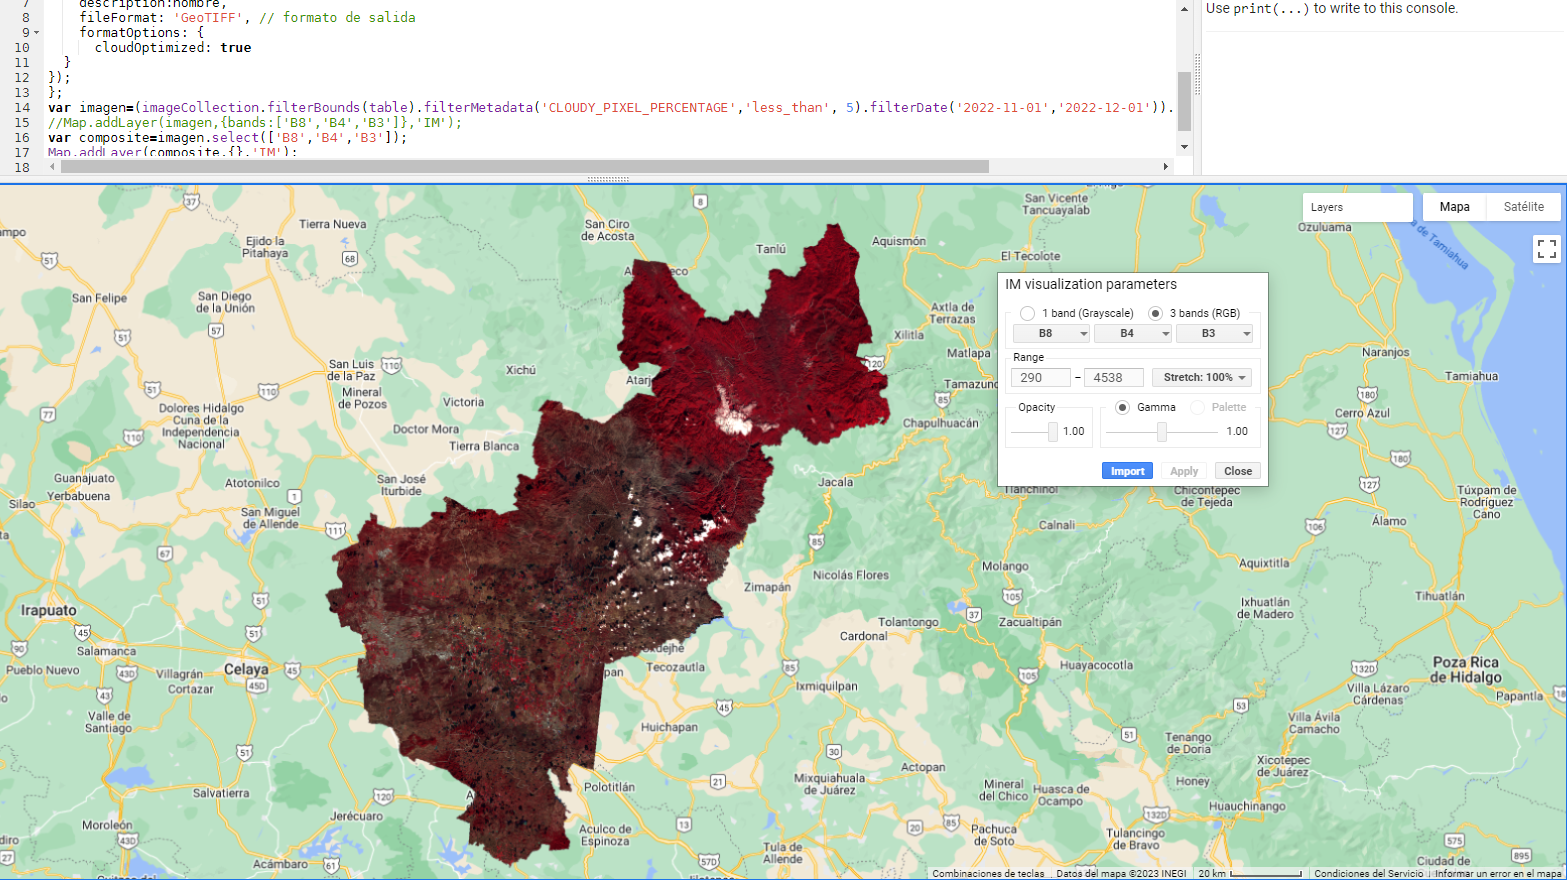

2- Se realizó un entrenamiento para identificar áreas de sembradas, preparadas para siembra y parcelas sin actividad agrícola a partir de fotointerpretaciòn.

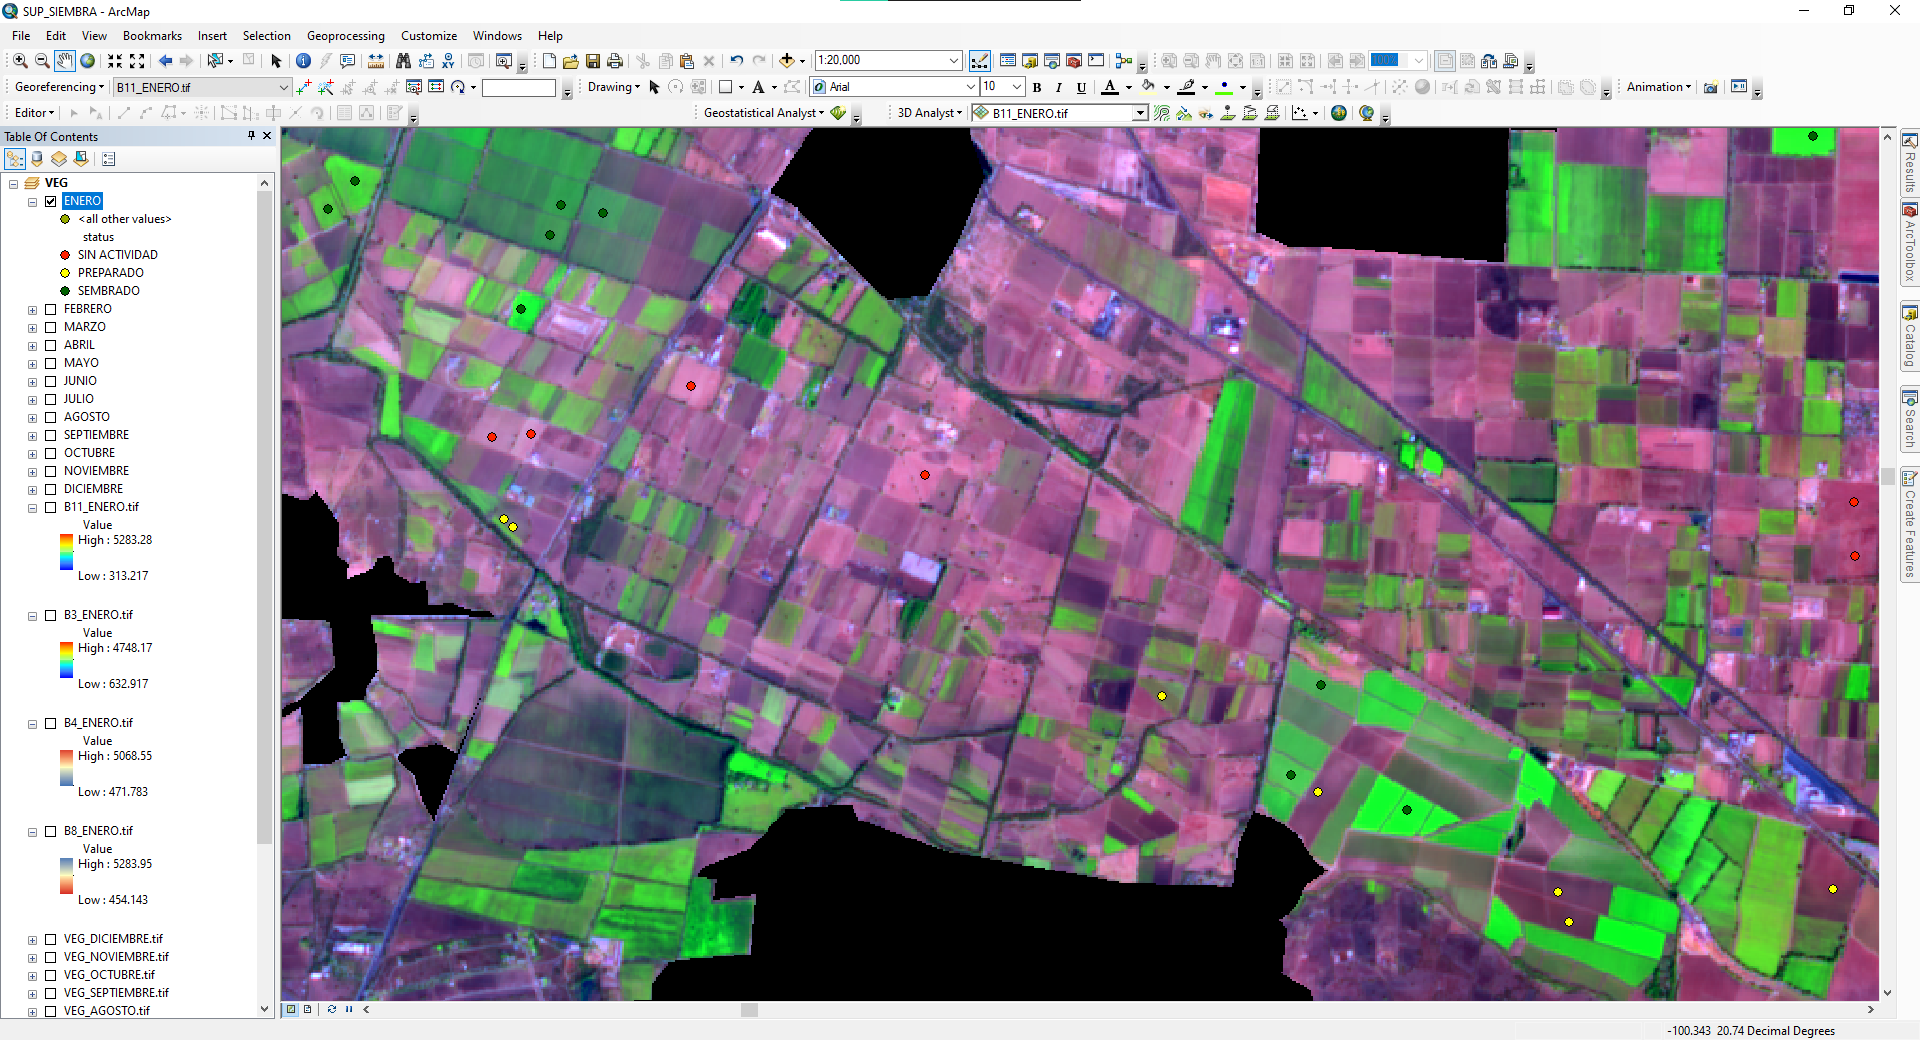

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
plt.style.use('ggplot')
import warnings
import sklearn
from sklearn.metrics import pairwise_distances_argmin_min
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
warnings.filterwarnings('ignore')
path="/content/drive/MyDrive/DOCUMENTOS/TRABAJO/ANALISIS_SIEMBRA/DATASET_SIEMBRA.csv"
df = pd.read_csv(path,sep=',',header=0,encoding='latin1')
df.head()

,OBJECTID,MES,SEMBRADO,PREPARADO,SV,POINT_X,POINT_Y,B3,B4,B8,B11,NDVI,NDMI,STATUS,HUMEDAD,TEMPERATUR,HUM_ORD,TEMP_ORD,MES_ORD,STATUS_ORD
0,445,ENERO,1,0,0,-100.275529,20.749692,1153.491667,940.541667,4228.416667,1525.058333,0.677746,0.450638,SEMBRADO,BAJA,BAJA,1,3,1,3.0
1,446,ENERO,1,0,0,-100.294862,20.717644,1142.750000,928.266667,4371.650000,1409.091667,0.685861,0.513720,SEMBRADO,BAJA,BAJA,1,3,1,3.0
2,447,ENERO,1,0,0,-100.298974,20.723573,1274.166667,1255.933333,3181.716667,1931.775000,0.405492,0.178517,SEMBRADO,BAJA,BAJA,1,3,1,3.0
3,448,ENERO,1,0,0,-100.300402,20.719290,1304.316667,1252.425000,3591.016667,1926.808333,0.463587,0.250436,SEMBRADO,BAJA,BAJA,1,3,1,3.0
4,449,ENERO,1,0,0,-100.337008,20.741448,1258.975000,1029.850000,4308.633333,1512.483333,0.706512,0.483229,SEMBRADO,BAJA,BAJA,1,3,1,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    1332 non-null   int64  
 1   MES         1332 non-null   object 
 2   SEMBRADO    1332 non-null   int64  
 3   PREPARADO   1332 non-null   int64  
 4   SV          1332 non-null   int64  
 5   POINT_X     1332 non-null   float64
 6   POINT_Y     1332 non-null   float64
 7   B3          1332 non-null   float64
 8   B4          1332 non-null   float64
 9   B8          1332 non-null   float64
 10  B11         1332 non-null   float64
 11  NDVI        1332 non-null   float64
 12  NDMI        1332 non-null   float64
 13  STATUS      1314 non-null   object 
 14  HUMEDAD     1332 non-null   object 
 15  TEMPERATUR  1332 non-null   object 
 16  HUM_ORD     1332 non-null   int64  
 17  TEMP_ORD    1332 non-null   int64  
 18  MES_ORD     1332 non-null   int64  
 19  STATUS_ORD  1314 non-null  

In [ ]:
df2 = df.copy()

In [ ]:
df.isnull().sum().sort_values(ascending=False)

STATUS_ORD    18
STATUS        18
MES            0
MES_ORD        0
TEMP_ORD       0
HUM_ORD        0
TEMPERATUR     0
HUMEDAD        0
NDMI           0
NDVI           0
OBJECTID       0
B8             0
B4             0
B3             0
POINT_Y        0
POINT_X        0
SV             0
PREPARADO      0
SEMBRADO       0
B11            0
dtype: int64

In [ ]:
df = df.drop_duplicates()

**Cual la distribución de las distintas bandas e indices con respecto al estatus de actividad agricola?**

In [ ]:
import plotly.express as px

fig = px.box(df, x="STATUS", y=["B3"], 
             title="Distribución de B3 según el estado de actividad agrícola")

fig.show()


In [ ]:
fig = px.box(df, x="STATUS", y=["B4"], 
             title="Distribución de B4 según el estado de actividad agrícola")

fig.show()


In [ ]:
fig = px.box(df, x="STATUS", y=["B8"], 
             title="Distribución de B8 según el estado de actividad agrícola")

fig.show()


In [ ]:
fig = px.box(df, x="STATUS", y=["B11"], 
             title="Distribución de B11 según el estado de actividad agrícola")

fig.show()


In [ ]:
fig = px.box(df, x="STATUS", y=["NDVI"], 
             title="Distribución de NDVI según el estado de actividad agrícola")

fig.show()


In [ ]:
fig = px.box(df, x="STATUS", y=["NDMI"], 
             title="Distribución de NDMI según el estado de actividad agrícola")

fig.show()


Después de analizar la distribución de distintas bandas e índices con respecto al estatus de actividad agrícola en el conjunto de datos, se observa que ciertos umbrales presentan una amplitud considerable, lo que indica una gran variabilidad en los datos. Es posible que este fenómeno se deba a que el análisis se ha realizado en todo el universo de datos sin considerar factores temporales, como las variaciones en las condiciones climáticas y de cultivo a lo largo del tiempo.

Por lo tanto, se sugiere realizar un análisis de los umbrales por mes para obtener una visión más detallada y precisa de la relación entre las distintas bandas e índices y el estatus de actividad agrícola. De esta manera, se podrían identificar patrones y tendencias en los datos que no son evidentes en un análisis global y se podrían obtener conclusiones más acertadas y útiles para el proyecto.

**Cual la distribución de las distintas bandas e indices con respecto al estatus de actividad agricola por mes?**

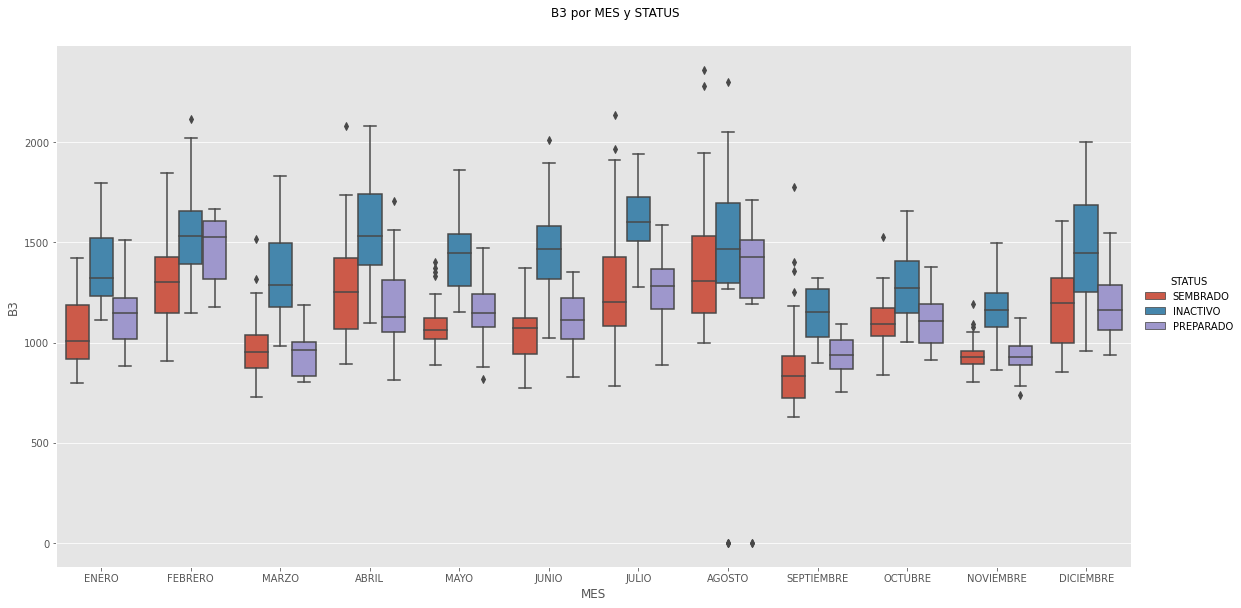

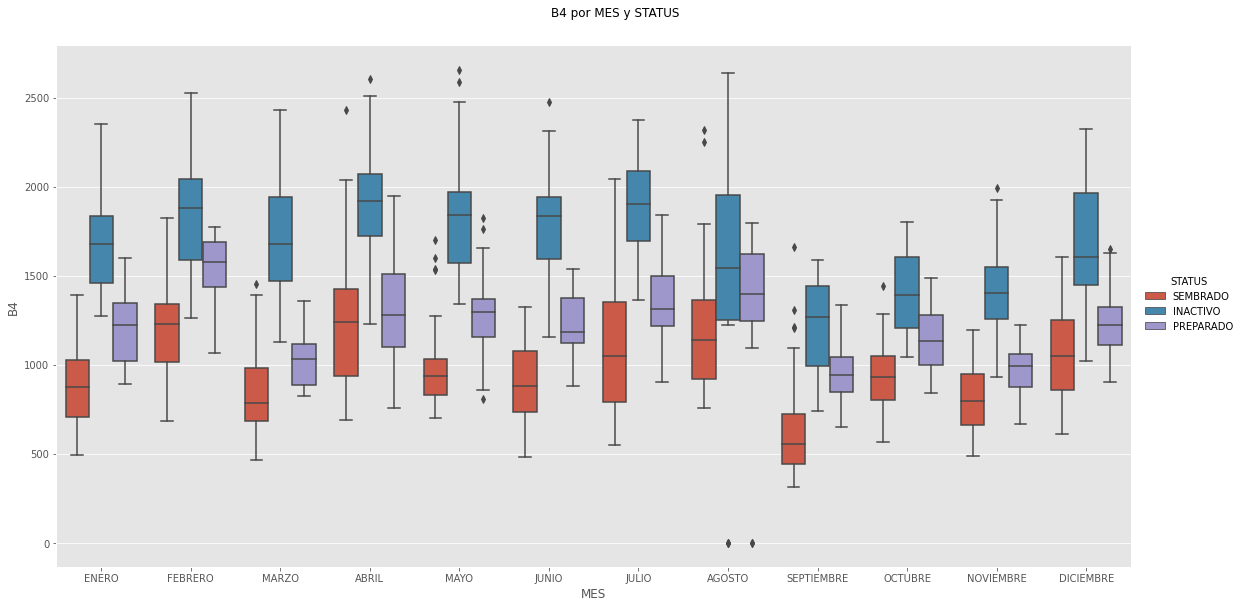

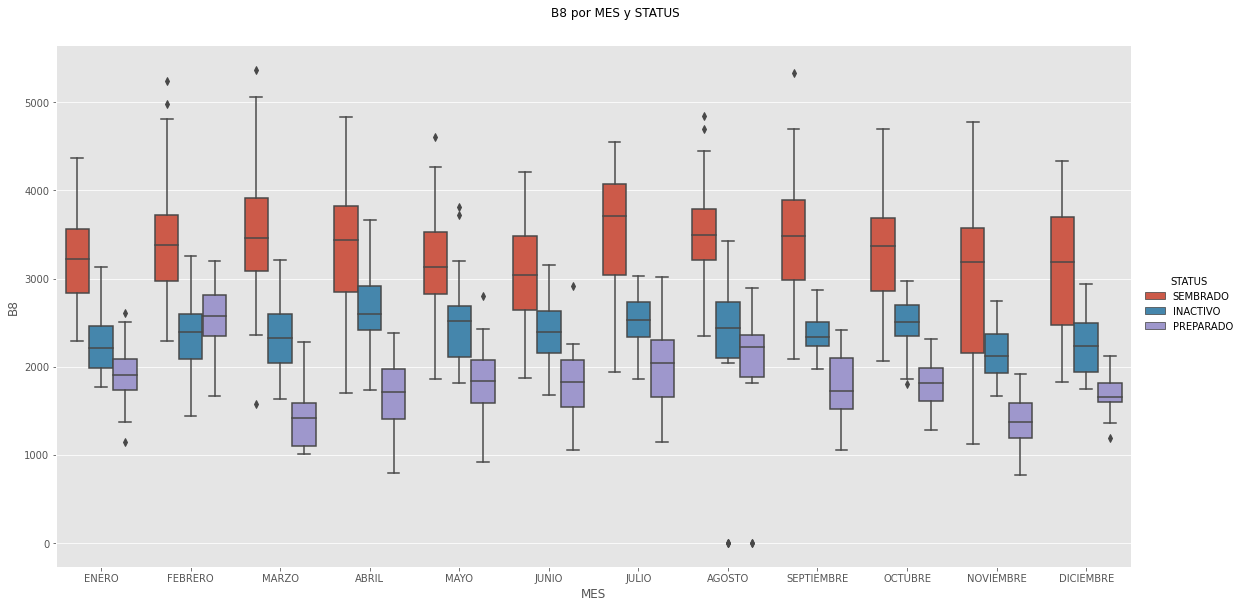

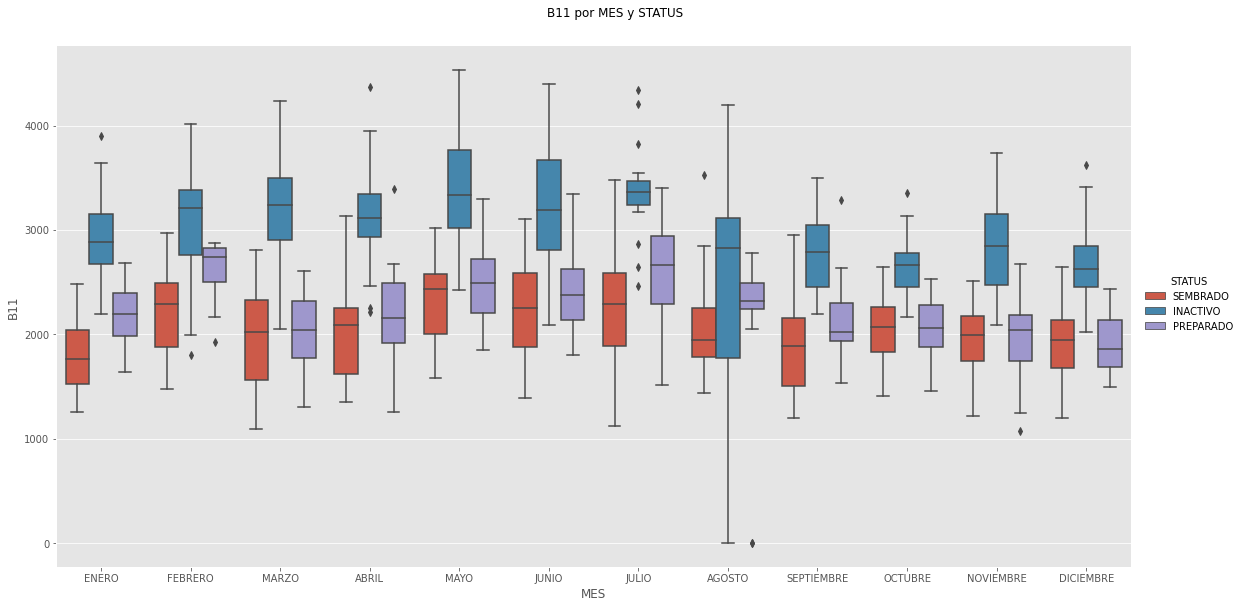

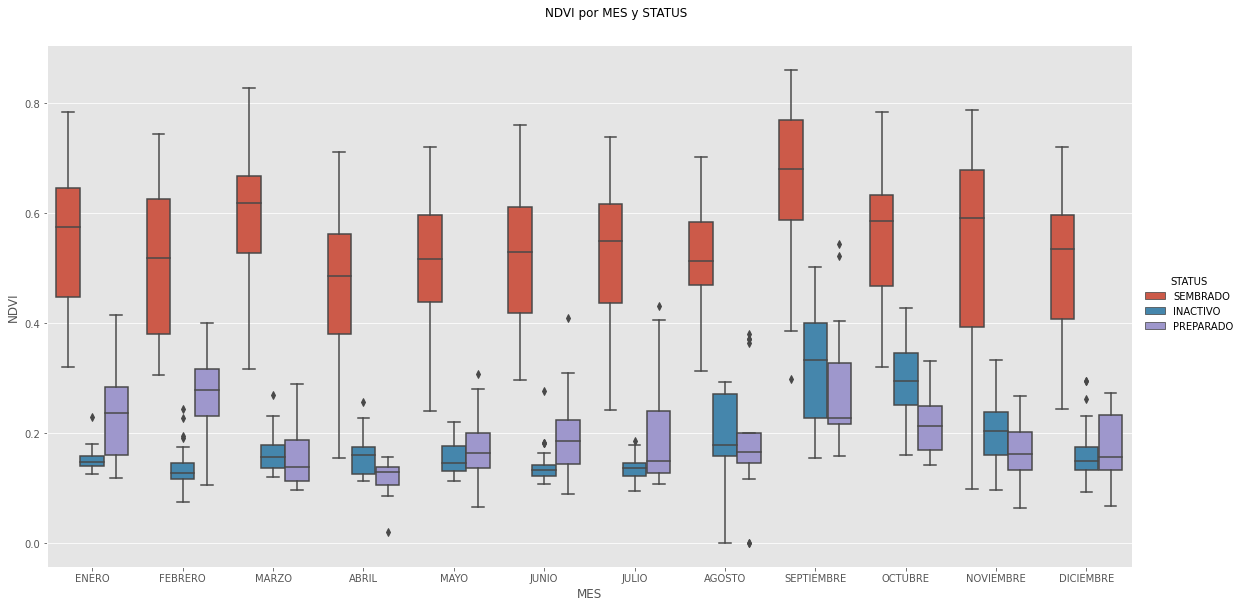

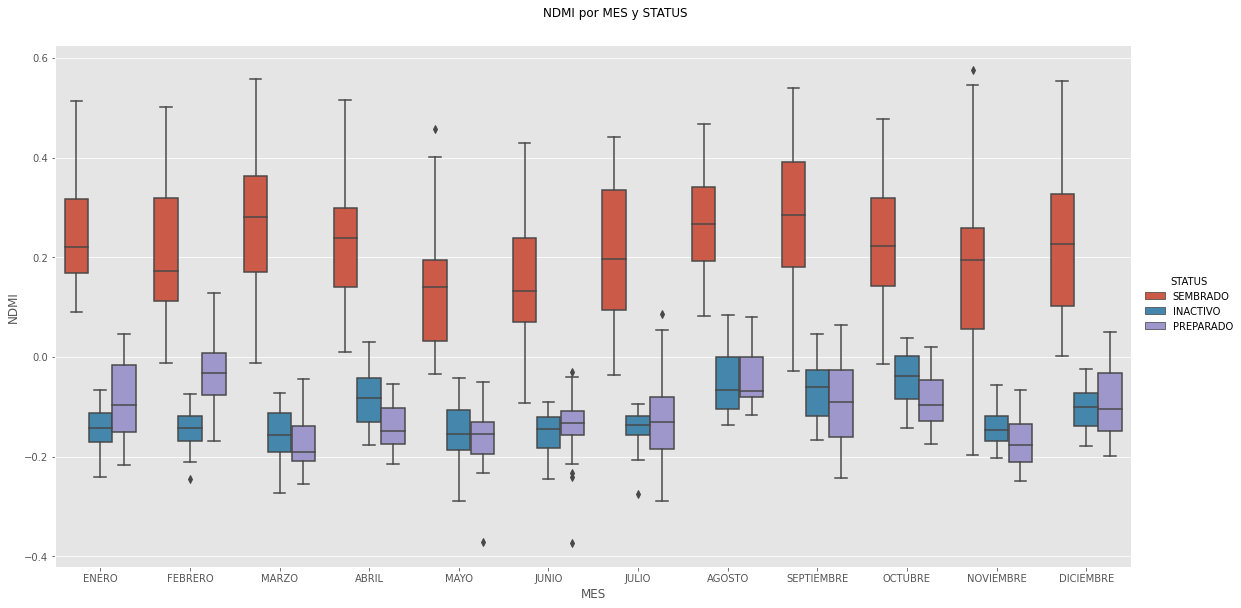

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for var in ['B3', 'B4', 'B8','B11', 'NDVI', 'NDMI']:
    g = sns.catplot(x='MES', y=var, hue='STATUS', kind='box', data=df, height=8, aspect=2)
    g.fig.suptitle(f'{var} por MES y STATUS', y=1.05)
    plt.show()


Durante el análisis del conjunto de datos, se pudo observar que los diferentes estados de actividad agrícola presentaron respuestas espectrales similares en ciertas bandas durante épocas específicas del año. 

Esto podría deberse a la presencia de ciertas condiciones ambientales, como la temperatura, la humedad y la luz solar, que afectan la respuesta espectral de los cultivos en ciertas bandas durante épocas específicas del año. 

**¿Cómo ha evolucionado el estatus de las parcelas en el tiempo y cuáles son las tendencias observadas?**


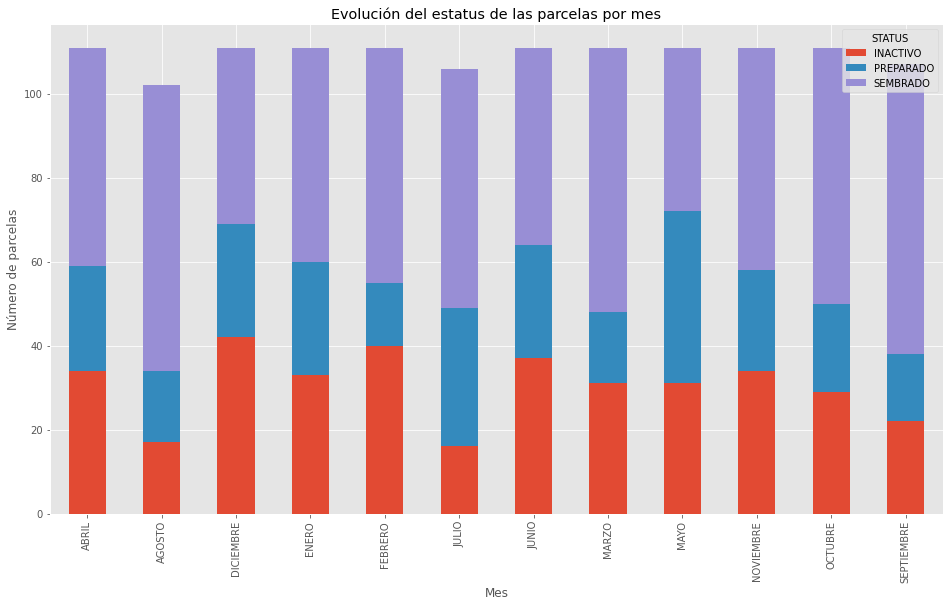

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data=df
# Convertir la columna "MES" en una columna de tipo fecha
data["MES_ORD"] = pd.to_datetime(data["MES_ORD"])

# Agrupar los datos por mes y estatus
estatus_por_mes = data.groupby(["MES", "STATUS"]).size().unstack()

# Crear una gráfica de barras para mostrar la evolución del estatus de las parcelas en cada mes
estatus_por_mes.plot(kind="bar", stacked=True)
plt.title("Evolución del estatus de las parcelas por mes")
plt.xlabel("Mes")
plt.ylabel("Número de parcelas")
plt.show()



Con estas gráficas, se puede observar cómo ha evolucionado el estatus de las parcelas y las tendencias observadas.

**¿Cuáles son los meses con mayor cantidad de áreas sembradas y preparadas?**

Text(0, 0.5, 'Cantidad')

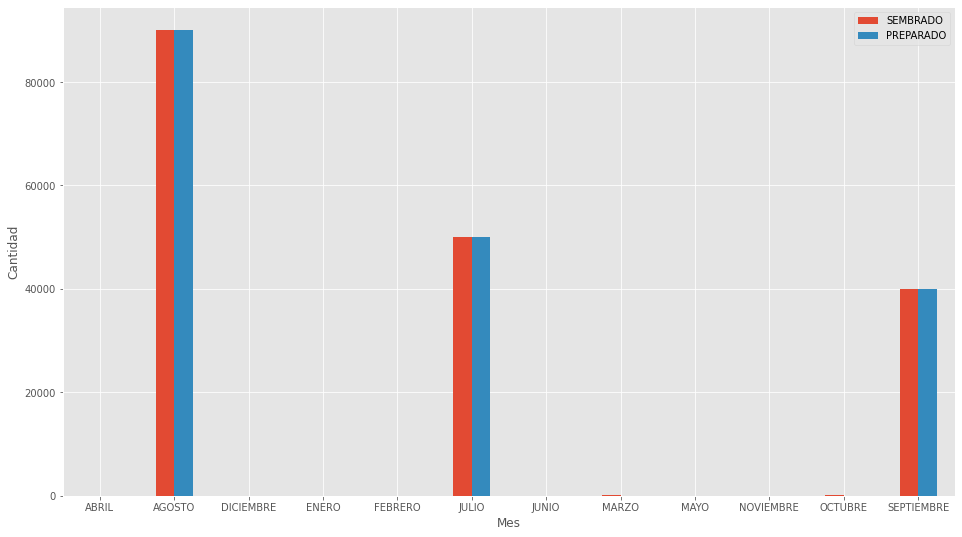

In [ ]:
import matplotlib.pyplot as plt

df_month = df.groupby("MES").agg({"SEMBRADO": "sum", "PREPARADO": "sum"})
df_month.plot(kind="bar", rot=0)
plt.xlabel("Mes")
plt.ylabel("Cantidad")


Se encontró que los meses de julio, agosto y septiembre presentaron la mayor actividad agrícola en la región. Estos meses coinciden con la temporada de lluvias en la zona, lo que sugiere que los cultivos registrados en la región son principalmente de temporal.

**Cuales son las variables mas correlacionadas a los distintos estatus de actividad agrícola?**

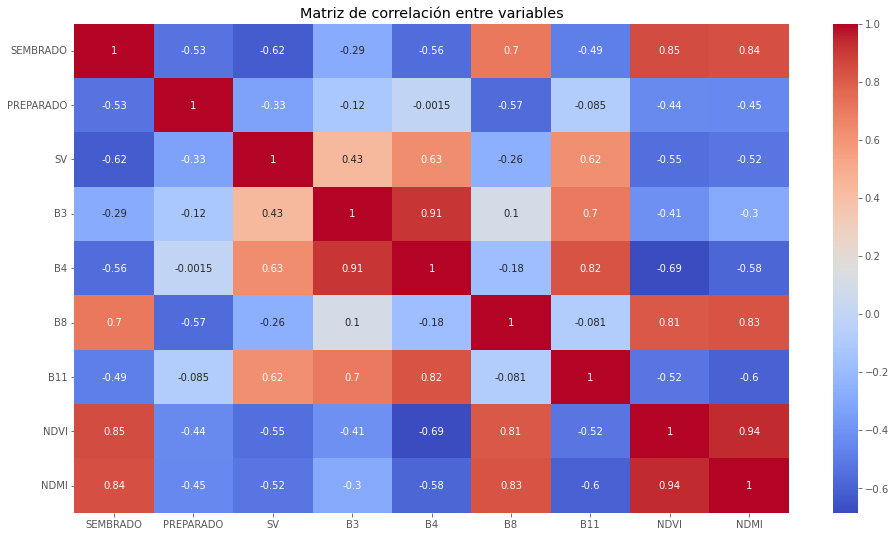

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas de interés
cols = ['SEMBRADO', 'PREPARADO', 'SV','B3', 'B4', 'B8','B11', 'NDVI', 'NDMI']

# Calcular la matriz de correlación
corr = df[cols].corr()

# Visualizar la matriz de correlación con un mapa de calor
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Matriz de correlación entre variables')
plt.show()


1- Se encontró que el estado de actividad agrícola "SEMBRADO" presenta una mayor correlación con los índices de vegetación NDVI y NDMI, así como con la banda B8. Dicha correlación positiva sugiere una posible relación entre el estado de actividad agrícola y la salud de la vegetación en las parcelas de cultivo.

La banda B8 de Sentinel 2, que corresponde al infrarrojo cercano (NIR), ha demostrado ser útil en la evaluación de la salud de los cultivos y la detección de cambios en la actividad agrícola. Según un estudio de investigación publicado por la revista Remote Sensing, se encontró una alta correlación entre la banda B8 y la fracción de cobertura vegetal en un área de cultivo de trigo. Además, otro estudio publicado en la revista Agricultural and Forest Meteorology encontró que la banda B8 es útil para detectar cambios en la actividad agrícola en regiones semiáridas de la India. En resumen, los estudios científicos indican que la banda B8 de Sentinel 2 es una herramienta valiosa para monitorear y evaluar la actividad agrícola.

2- Se observó que el suelo preparado para siembra presenta una correlación no significativa con ninguna banda del espectro electromagnético. Sin embargo, se observó una mayor correlación con las bandas B4, B3 y B11 en comparación con las demás bandas.

La literatura científica ha demostrado que la banda 3 de Sentinel 2 está altamente relacionada con la humedad del suelo, ya que se encuentra en la región del espectro donde la radiación electromagnética es absorbida por el agua en el suelo. Por otro lado, la banda 11 de Sentinel 2 también es sensible a la humedad del suelo debido a la presencia de agua en el suelo que emite radiación térmica.

En el caso del suelo preparado para siembra, se sabe que generalmente se remueve y se riega para prepararlo para la siembra. Por lo tanto, es posible que la mayor correlación entre las bandas 3 y 11 y el suelo preparado para siembra se deba a la presencia de agua en el suelo, como resultado del riego. La remoción del suelo también puede afectar la reflectancia de las bandas 3 y 11, lo que puede contribuir a la mayor correlación observada.

3- Se encontró que las bandas espectrales B3, B4 y B11 presentan la mayor correlación con el suelo sin actividad agrícola.



